General data
Air density: 1.2097+/-0.0007
Air viscosity: (1.8317+/-0.0005)e-05
Pipe area:  0.00283+/-0.00009
-------------------------
stream profile 1.csv
Average velocity [m/s]: 5.9+/-0.7
Reynolds number: (2.35+/-0.26)e+04
Flow rate [m^3/s]: 0.0168+/-0.0018
-------------------------
stream profile 2.csv
Average velocity [m/s]: 6.9+/-0.7
Reynolds number: (2.72+/-0.28)e+04
Flow rate [m^3/s]: 0.0194+/-0.0020


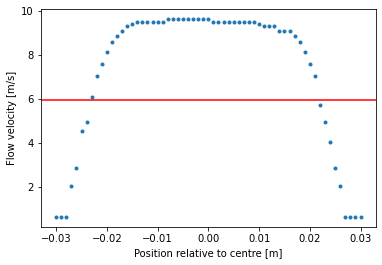

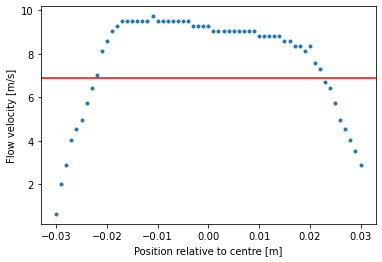

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from uncertainties import ufloat
from uncertainties import unumpy

#atmospheric conditions
air_temp = ufloat(23.8+273,0.1)
air_pressure = ufloat(1030.4*100,0.5*100)

#constants for mu calculations
t0 = 273
mu0 = 1.716e-5
smu = 111

#calculations for key air properties
rho = (air_pressure*0.02897)/(8.314*air_temp)
mu = mu0*(air_temp/t0)**(3/2)*((t0+smu)/(air_temp+smu))

#information about velocity profile sweep
dr = ufloat(1/1000,0.1/1000) #step size 
pipe_radius = ufloat(30/1000,0.5/1000) #pipe radius (larger then 2" due to flange) 

pipe_area = (3.1416)*pipe_radius**2

print("General data")
print("Air density:", rho)
print("Air viscosity:", mu)
print("Pipe area: ", pipe_area)

files = ["stream profile 1.csv", "stream profile 2.csv"]

for file in files:

    
    data = np.genfromtxt(file, delimiter=',')
    
    position = data[:,0] #extract position
    pressure = data[:,1] #extract pressure
    pressure_uncertainty = data[:,2] #extract pressure uncertainty
    
    pressure = unumpy.uarray(pressure, pressure_uncertainty) #add uncertainty data
    pressure = pressure*(248.84) #convert from cm-water to Pa
      
    velocity = unumpy.sqrt(2*pressure/rho) #calculate stream velocity from pressure
    
    # integrate using trapazoidal method to find volumetric flow rate -----------------------
    
    flow_rate = dr*velocity*abs(position)*(3.1416)/2
    
    flow_rate = np.sum(flow_rate) + np.sum(flow_rate[1:-1])
    
    # done integration -----------------------------------------------------------------------
    
    average_velocity = flow_rate/pipe_area #calculate average velocity
    Re = rho*average_velocity*2*pipe_radius/mu
    
    # output ---------------------------------------------------------------------------------
    
    plt.figure(file)
    plt.plot(position, unumpy.nominal_values(velocity), '.')
    plt.axhline(y=(average_velocity.nominal_value), color='r', linestyle='-')
    plt.xlabel("Position relative to centre [m]")
    plt.ylabel("Flow velocity [m/s]")
    
    
    print("-------------------------")
    print(file)
    print("Average velocity [m/s]:", average_velocity)
    print("Reynolds number:", Re)
    print("Flow rate [m^3/s]:", flow_rate)